# Data Science Test - Hospital Israelita Albert Einstein
## Autor: Henrique Martins Prado
#### *** No final deste arquivo se encontra a síntese de resultados e conclusões das análises ***

### Carregando as bibliotecas

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# from sklearn.svm import SVC
# from sklearn.ensemble import ExtraTreesClassifier
# import graphviz
# from sklearn.tree import export_graphviz

### Realizando a configuração do jupyter notebook

In [13]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container {width:90% !important;}</style>"))

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 2000)

### Carregando o dataset chamado de dfPoints

In [14]:
dfPoints = pd.read_csv(r"C:\Users\Henrique.HENRIQUE\Documents\Empresas\Entrevistas\Hospital Albert Einstein\Cientista de Dados\df_points.txt", delimiter="\t")

# Visualizando quantidade de linhas X colunas
dfPoints.shape

(10000, 5)

### Análise Exploratória de Dados

In [15]:
# Visualizando os primeiros 5 registros
dfPoints.head()

,Unnamed: 0,x,y,z,label
0,0,326.488285,188.988808,-312.205307,0.0
1,1,-314.287214,307.276723,-179.037412,1.0
2,2,-328.208910,181.627758,446.311062,1.0
3,3,-148.658890,147.027947,-27.477959,1.0
4,4,-467.065931,250.467651,-306.475330,1.0


In [16]:
# Visualizando os últimos 5 registros
dfPoints.tail() #

,Unnamed: 0,x,y,z,label
9995,9995,-324.762823,-267.451535,73.363576,1.0
9996,9996,-362.470736,176.772240,138.991471,0.0
9997,9997,-401.675105,-273.322169,230.795823,1.0
9998,9998,-378.615726,73.227279,-368.644222,1.0
9999,9999,274.771830,-140.925809,59.427905,0.0


In [17]:
# Visualizando apenas as colunas do dataset
dfPoints.columns

Index(['Unnamed: 0', 'x', 'y', 'z', 'label'], dtype='object')

In [18]:
# Verificando os tipos de dados das colunas do meu dataset
dfPoints.dtypes

Unnamed: 0      int64
x             float64
y             float64
z             float64
label         float64
dtype: object

#### Apresentando informações estatísticas do dataset

In [19]:
# Removi a coluna 0 (Unnamed:0) do dataset, porque é uma coluna ranqueamento do dataset df_points.txt 
estatisticas = dfPoints.iloc[:, 1:5]
estatisticas.describe()

,x,y,z,label
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.850362,-3.108769,-2.601124,0.502700
std,288.379928,287.120263,290.379789,0.500018
min,-499.802348,-499.899134,-499.952571,0.000000
25%,-249.199895,-248.954580,-258.005693,0.000000
50%,3.663472,-5.446168,-8.221000,1.000000
75%,248.879970,244.395864,252.930406,1.000000
max,499.872453,499.752418,499.872329,1.000000


#### Correlação das variáveis

##### Entre variáveis independentes

In [20]:
# Correção entre as variáveis x e y
np.corrcoef(dfPoints.x, dfPoints.y)

# É possível verificar que possuem correlação baixíssima. 
# Quanto mais próximo de 1 ou -1 indica alto índice de correlação

array([[ 1.        , -0.00787305],
       [-0.00787305,  1.        ]])

In [21]:
# Correção entre as variáveis x e y
np.corrcoef(dfPoints.x, dfPoints.z)

# É possível verificar que possuem alguma correlação (-0.68573072)

array([[1.00000000e+00, 3.31426928e-04],
       [3.31426928e-04, 1.00000000e+00]])

In [22]:
# Correção entre as variáveis y e z
np.corrcoef(dfPoints.y, dfPoints.z)

# É possível verificar que possuem correlação baixa como apresentado na correlação entre x e y

array([[1.        , 0.00763605],
       [0.00763605, 1.        ]])

In [23]:
# Verificando a quantidade de instâncias relacionadas as saídas 1 e 0 da minha variável dependente label.
dfPoints['label'].value_counts()

1.0    5027
0.0    4973
Name: label, dtype: int64

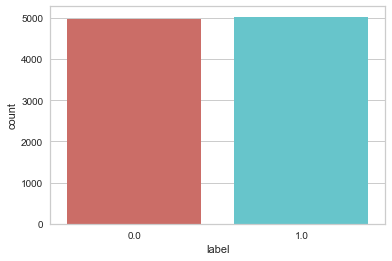

<Figure size 432x288 with 0 Axes>

In [24]:
# Gerando gráfico para ver distribuição da variável dependente label
sns.countplot(x = 'label', data = dfPoints, palette = 'hls')
plt.show()
plt.savefig('count_plot')

# Obs.: É possível ver que a ditribuição é bem semelhante, ou seja, temos quase a mesma quantidade de 1 e 0 na minha variável dependente chamada de label.

### Segregando o dataset com variáveis previsoras (independentes) da minha variável a ser prevista (label/dependente) 

#### Previsoras

In [25]:
# Como estou pegando o intervalo ele está capturando da coluna 0 até a coluna 19
previsoras = dfPoints.iloc[:, 1:4].values 

In [26]:
# Obs.: Interessante observar que quando coloco .values no final da minha segregação, automaticamente transformo o dataframe em um array
previsoras

array([[ 326.48828486,  188.98880779, -312.20530651],
       [-314.28721419,  307.27672314, -179.03741228],
       [-328.20891006,  181.62775751,  446.3110616 ],
       ...,
       [-401.67510502, -273.32216919,  230.79582259],
       [-378.61572605,   73.22727899, -368.64422212],
       [ 274.77182961, -140.92580912,   59.42790503]])

In [27]:
type(previsoras) # Apresentando minhas transformação para o formato array ao invés de um dataframe

numpy.ndarray

In [28]:
# Trazendo todos os valores na posição 0
previsoras[0] 

array([ 326.48828486,  188.98880779, -312.20530651])

#### Label

In [29]:
classe = dfPoints.iloc[:, 4].values
classe

array([0., 1., 1., ..., 1., 1., 0.])

### Utilizando a função train_test_split para separar os dados de treino e teste

In [30]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsoras, classe, test_size = 0.3, random_state = 0) 
# Estou utilizando o parametro random_state igual a 0 para garantir que toda vez que eu executar a linhas acima sejam captadas as mesmas segregações
# Obs.: Apenas para efeito de justificativa, a separação entre dados de treinamento e teste é para treinar o modelo (função matemática que explica o "comportamento") dos dados
#e dados de teste para validar a precisão do meu modelo

In [31]:
# Verificando a segregação de dados
print('__________ Treinamento __________', '\nDados de Treinamento:' , X_treinamento.shape, '\nLabel de Treinamento:', y_treinamento.shape)
print('\n_____________ Teste _____________', '\nDados de Teste:' , X_teste.shape, '\nLabel de Teste:', y_teste.shape)

__________ Treinamento __________ 
Dados de Treinamento: (7000, 3) 
Label de Treinamento: (7000,)

_____________ Teste _____________ 
Dados de Teste: (3000, 3) 
Label de Teste: (3000,)


### Modelo: Regressão Logística

In [21]:
# Criando o  modelo de regressão logistica
reglog = LogisticRegression()

In [22]:
# Realizando o fit do meu modelo. Em outras palavras, processo de aprendizagem do meu algoritmo de regressão logística
reglog.fit(X_treinamento, y_treinamento)

c:\users\henrique.henrique\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# Realização das previsões utilizando o modelo e os dados de Teste
previsoes_reglog = reglog.predict(X_teste)
previsoes_reglog

array([1., 1., 1., ..., 1., 1., 1.])

In [24]:
# Verificação da taxa de acerto
taxa_acerto_reglog = accuracy_score(y_teste, previsoes_reglog)
taxa_acerto_reglog

0.511

In [25]:
# Verificação da taxa de erro
taxa_erro_reglog = 1-taxa_acerto_reglog
taxa_erro_reglog

0.489

In [26]:
# Utilizando a matriz de confusão para comparar os valores encontrados ou previstos com a variável y_teste
confusao_reglog = confusion_matrix(y_teste, previsoes_reglog)
confusao_reglog

array([[ 516,  997],
       [ 470, 1017]], dtype=int64)

c:\users\henrique.henrique\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


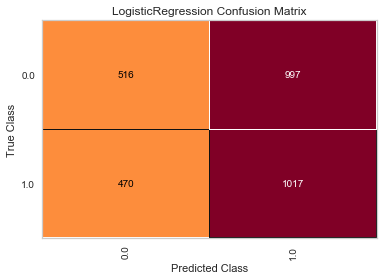

In [27]:
# Crio o objeto v de visualização utilizando a biblioteca yellowbrick para deixar os resultados mais agradáveis
v = ConfusionMatrix(LogisticRegression())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [28]:
# Verificando o precision, recall, f1-score e support
print(classification_report(y_teste, previsoes_reglog))

              precision    recall  f1-score   support

         0.0       0.52      0.34      0.41      1513
         1.0       0.50      0.68      0.58      1487

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.50      3000
weighted avg       0.51      0.51      0.50      3000



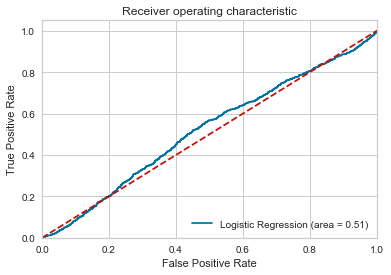

In [29]:
# Verificando a curva ROC
logit_roc_auc = roc_auc_score(y_teste, reglog.predict(X_teste))
fpr, tpr, thresholds = roc_curve(y_teste, reglog.predict_proba(X_teste)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Modelo: Classificador Naive Bayes - Gaussian

In [30]:
# Criando o objeto NaiveBayes
naive_bayes = GaussianNB()

In [31]:
# Vamos fazer o treinamento do modelo com o "fit", ou seja, com o fit vou tentar encaixar o dados de treinamento no modelo 
#tentando relacionar os dados de treinamento (X_treinamento) com as resposta (y_treinamento)
naive_bayes.fit(X_treinamento, y_treinamento)

# Obs.: Este algoritmo do python não permite que seja verificado as probabilidades que foram geradas, porém a tabela de probabilidade já foi criada.
# Assim, não precisarei mais dos dados de X_treinamento, porque o modelo já foi criado e também treinado através do "fit" com os dados de treinamento

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
# Efetuando as previsões
previsoes_nb = naive_bayes.predict(X_teste)

In [33]:
# Abrindo os valores encontrados de previsão
previsoes_nb[:]

array([1., 0., 1., ..., 1., 1., 1.])

In [34]:
# Verificação
previsoes_nb.shape # 30% da minha quantidade total, gerou os 3.000 registros esperados

(3000,)

In [35]:
# Utilizando a matriz de confusão para comparar os valores encontrados ou previstos com a variável y_teste
confusao_nb = confusion_matrix(y_teste, previsoes_nb)
confusao_nb

array([[ 508, 1005],
       [ 490,  997]], dtype=int64)

In [36]:
# Verificação da taxa de acerto
taxa_acerto_nb = accuracy_score(y_teste, previsoes_nb)
taxa_acerto_nb

0.5016666666666667

In [37]:
# Verificação da taxa de erro
taxa_erro_nb = 1-taxa_acerto_nb
taxa_erro_nb

0.4983333333333333

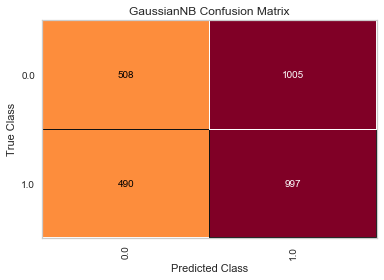

In [38]:
# Crio o objeto v de visualização utilizando a biblioteca yellowbrick para deixar os resultados mais agradáveis
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [39]:
# Verificando o precision, recall, f1-score e support
print(classification_report(y_teste, previsoes_nb))

              precision    recall  f1-score   support

         0.0       0.51      0.34      0.40      1513
         1.0       0.50      0.67      0.57      1487

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.49      3000
weighted avg       0.50      0.50      0.49      3000



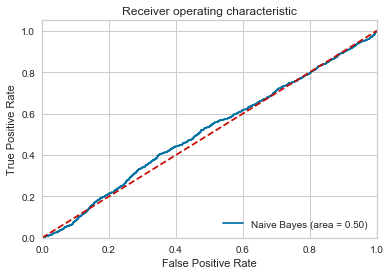

In [40]:
# Verificando a curva ROC
logit_roc_auc = roc_auc_score(y_teste, naive_bayes.predict(X_teste))
fpr, tpr, thresholds = roc_curve(y_teste, naive_bayes.predict_proba(X_teste)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Modelo: Random Forest

In [41]:
# Crio meu objeto no qual recebe o algoritmo
floresta = RandomForestClassifier(n_estimators = 10000)

# Obs.: O parâmetro n_estimator apresenta a quantidade de árvores que o meu modelo irá utilizar para classificar

In [42]:
# 'Fito' meu modelo floresta com os dados de treinamento. 
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
# Previsões
previsoes_rf = floresta.predict(X_teste)
previsoes_rf

array([0., 1., 1., ..., 1., 1., 1.])

In [44]:
# Verificando taxa de acerto
taxa_acerto_rf = accuracy_score(y_teste, previsoes_rf)
taxa_acerto_rf

0.7736666666666666

In [45]:
# Verificando Taxa de Erro
taxa_erro_rf = 1 - taxa_acerto_rf
taxa_erro_rf

0.2263333333333334

In [46]:
# Matrix de confusão
confusao_rf = confusion_matrix(y_teste, previsoes_rf)
confusao_rf

array([[1159,  354],
       [ 325, 1162]], dtype=int64)

c:\users\henrique.henrique\appdata\local\programs\python\python35\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


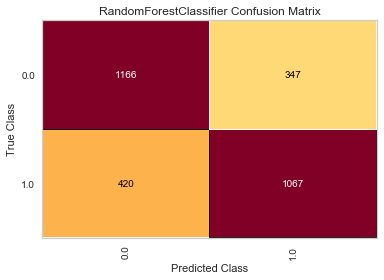

In [47]:
# Criando o objeto v de visualização
v = ConfusionMatrix(RandomForestClassifier())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [48]:
# Verificando o precision, recall, f1-score e support
print(classification_report(y_teste, previsoes_rf))

              precision    recall  f1-score   support

         0.0       0.78      0.77      0.77      1513
         1.0       0.77      0.78      0.77      1487

    accuracy                           0.77      3000
   macro avg       0.77      0.77      0.77      3000
weighted avg       0.77      0.77      0.77      3000



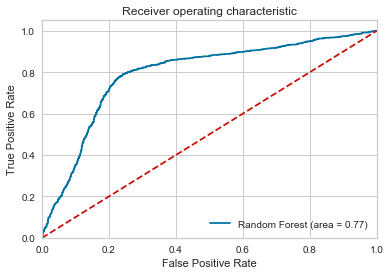

In [49]:
# Verificando a curva ROC
logit_roc_auc = roc_auc_score(y_teste, floresta.predict(X_teste))
fpr, tpr, thresholds = roc_curve(y_teste, floresta.predict_proba(X_teste)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Modelo: Árvore de Decisão

In [50]:
arvore = DecisionTreeClassifier()

In [51]:
# Fazendo o aprendizado do modelo
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [52]:
# Realizando as previsões
previsoes_ad = arvore.predict(X_teste)
previsoes_ad

array([0., 1., 1., ..., 1., 1., 0.])

In [53]:
# Verificando a taxa de acerto
taxadeacerto_ad = accuracy_score(y_teste, previsoes_ad)
taxadeacerto_ad

0.6706666666666666

In [54]:
# Verificando a taxa de erro
taxadeerro_ad = 1 - taxadeacerto_ad
taxadeerro_ad

0.32933333333333337

In [55]:
# Matrix de confusão
confusao_ad = confusion_matrix(y_teste, previsoes_ad)
confusao_ad

array([[ 992,  521],
       [ 467, 1020]], dtype=int64)

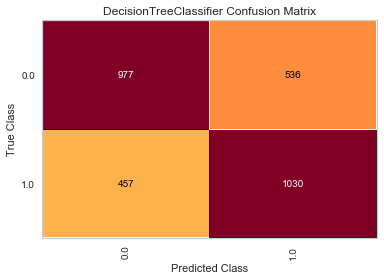

In [56]:
# Crio o objeto v de visualização
v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [57]:
# Verificando o precision, recall, f1-score e support
print(classification_report(y_teste, previsoes_ad))

              precision    recall  f1-score   support

         0.0       0.68      0.66      0.67      1513
         1.0       0.66      0.69      0.67      1487

    accuracy                           0.67      3000
   macro avg       0.67      0.67      0.67      3000
weighted avg       0.67      0.67      0.67      3000



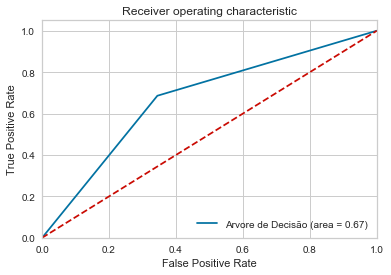

In [58]:
# Verificando a curva ROC
logit_roc_auc = roc_auc_score(y_teste, arvore.predict(X_teste))
fpr, tpr, thresholds = roc_curve(y_teste, arvore.predict_proba(X_teste)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Arvore de Decisão (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### ---------------------------------------------------------------------------------------------------------------------------

## Síntese de resultados e conclusões

### Problem & Answers

1 - Build a classification problem, using the columns x, y and z, trying to classify the label
column.

    a) Segregate a test and training frame.
        Utilizei o comando train_test_split para fazer a segregação dos dados de treinamento e dados de teste. Segreguei os dados dataset dfPoints com 70% para fazer o treinamento dos modelos e 30% (restante) para fazer testes.
    
    b) Use a GLM or Logistic Regression model and show the results.
        Apliquei o modelo de regressão logistica através do comando LogisticRegression() e fiz a apresentação dos resultados encontrados com as previsões encontradas pelo modelo.
        
    c) Use other method of your choice to handle the problem
        Tomei a liberdade de testar outros modelos como Naive-Bayes, Random Forest e Decisions Trees. São modelos aplicados a classificação no aprendizado supervionado.
        De maneira objetiva, o modelo:
            -Naive Bayes: Gera uma tabela de probabilidade. A classificação da instância ou registro é feita utilizando esta tabela.
            -Random Forest: Classifca o novo resgitro tendo como base diversas árvores de decisão. A quantidade que utilizei foram de 10.000 árvores.
            -Arvore de decisão: Classifica o novo registro percorrendo cada nó.
       
    d) Compare and comment the results on the models used from b) and c)
        Para comparar e comentar os resultados captados através da criação dos modelos utilizei a matriz de confusão verificando as taxas de acerto e erro dos mesmos, precisisão, recall, f1-score, suporte e curva ROC.
        
        Abaixo compartilho tabela com ranqueamento dos modelos de acordo com as taxas de acerto e erro encontradas:
        
            Rank    Modelo                  Taxa de Acerto (TA)      TA(~)        Taxa de Erro (TE)        TE(~)
            ----    --------------------    -------------------      -----        -----------------        -----
            1       Random Forest           0,772                    77%          0,227                    23% 
            2       Arvores de Decisão      0,667                    67%          0,332                    33%
            3       Regressão Logística     0,511                    51%          0,489                    49%
            4       Naive-Bayes             0,501                    50%          0,498                    50%  
            
        Pode ser observado que o modelo Random Forest apresentou uma taxa de acerto superior aos demais modelos com base nos dados que foram utilizados. Vale ressaltar que poderia ter sido utilizada algumas técnicas como seleçaõ de atributos, tratamento de valores missing, feature engineering, criação de variáveis dummy e outras abordagens fazendo um analise exploratória dos dados como também modificar parâmetros dos modelos para alcançar um melhor ajuste. 
         
        Outro ponto análise foi feito através da precisão, recall, f1-score e suporte.  
            A precisão é capacidade do classificador de não rotular uma amostra como positiva se for negativa.
            O recall é a capacidade do classificador de encontrar todas as amostras positivas
            O F1-score pode ser interpretado com um média harmônica entre a precisão e o recall, onde o melhor valor é 1 e o pior é 0.
            O suporte é o numero de ocorrências da classe no y_teste.
            
                Regressão Logistica ---------------------------------
                              precision    recall  f1-score   support
                   macro avg       0.51      0.51      0.50      3000
                weighted avg       0.51      0.51      0.50      3000
                
                Naive Bayes -----------------------------------------
                              precision    recall  f1-score   support
                   macro avg       0.50      0.50      0.49      3000
                weighted avg       0.50      0.50      0.49      3000
                
                Random Forest ---------------------------------------
                              precision    recall  f1-score   support
                   macro avg       0.77      0.77      0.77      3000
                weighted avg       0.77      0.77      0.77      3000
                
                Árvore de Decisão -----------------------------------
                              precision    recall  f1-score   support
                   macro avg       0.67      0.67      0.67      3000
                weighted avg       0.67      0.67      0.67      3000
        
            Olhando a tabela acima, pode ser verificado que o modelo Random Forest foi o modelo que apresentou os melhores sinais de precisão quando comparado com os demais modelos. O F1-score apresentado pelo modelo Random Forest foi de 0.77 de 1.
        
            Por fim a curva ROC é um outra ferramenta bastante utilizada com classificadores binários. A linha pontilhada representa a curva ROC. Um bom classificador fica o mais longe possível dessa linha (em direção ao canto superior esquerdo). Assim, pode ser observado que a curva ROC encontrada no modelo Random Forest é o que nos direciona que dentro os modelos aplicados, o modelo Random Forest é o melhor modelo utilizado nesta abordagem.
            
            Aplicar os dados em diferente modelos é uma boa prática para que sejam avaliadas diversas possibilidades e escolher a que possuir uma melhor acurácia para uma previsão. Edxistem diversas bibliotecas voltadas para machine learning que podem ser aplicadas neste contexto e ampliar as opções de verificação das previsões.